### **Asignment - 01**

### Import the Necessary libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

#### Download the NLTK sets.

In [2]:
nltk.download("wordnet") # It helps find conceptual relationship between the words
nltk.download('punkt') # It is pretrained tokenizer for English
nltk.download('averaged_perceptron_tagger') # Pretrained english POS Tagger
nltk.download('omw-1.4') # Open multilingual wordnet. The goal is to make it easy to use wordnets in multiple languages.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### Read the dataset

In [3]:
df = pd.read_csv('bbc-text.csv')

Print the head of the dataset

In [4]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.shape

(1370, 2)

In [6]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [7]:
df.category.replace(to_replace = 'tech', value = 0, inplace = True)
df.category.replace(to_replace = 'business', value = 1, inplace = True)
df.category.replace(to_replace = 'sport', value = 2, inplace = True)
df.category.replace(to_replace = 'entertainment', value = 3, inplace = True)
df.category.replace(to_replace = 'politics', value = 4, inplace = True)


In [8]:
df.head()

,category,text
0,0,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,3,ocean s twelve raids box office ocean s twelve...


catergorise into features and labels

In [9]:
features = df['text']
labels = df['category']

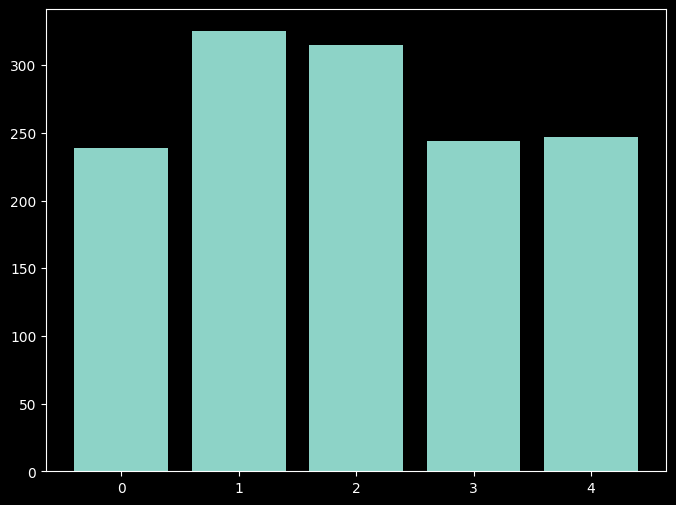

In [10]:
plt.figure(figsize = (8,6))
x, y = np.unique(labels, return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

### Split the model into training and testing

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [12]:
train_data.shape

(1096,)

In [13]:
train_data[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [14]:
train_labels[0]

0

Instantiate the vectorizer - TDIDF

In [15]:
vectorizer = TfidfVectorizer()

using fit.tranform(), we fit the model on training dataset.

In [16]:
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)

In [17]:
Xtrain.shape

(1096, 21966)

In [18]:
Xtrain

<1096x21966 sparse matrix of type '<class 'numpy.float64'>'
	with 223148 stored elements in Compressed Sparse Row format>

In [19]:
non_zero_elements = ((Xtrain != 0).sum() / np.prod(Xtrain.shape)) *100

In [20]:
print("Percentage of non-zero elements in Xtrain : %2.2f" % (non_zero_elements))

Percentage of non-zero elements in Xtrain : 0.93


### Using classification models:


*   Naive bayes
*   Logistic Regression



Instantiate, train and test on Naive Baye's Model

In [21]:
model = MultinomialNB()
model.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model.score(Xtest, test_labels)))

Training Accuracy : 0.98
Testing Accuracy : 0.95


Repeating the Experiment Using Stopwards because previously we used default values

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model = MultinomialNB()
model.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model.score(Xtest, test_labels)))

Training Accuracy : 0.99
Testing Accuracy : 0.97


Experiment with Lemmatization

In [23]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

Create a Tokenizer class for Lemmatization

In [24]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc) # word_tokenize is a function in NLTK
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

Using lemmatization

In [25]:
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model = MultinomialNB()
model.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.97
Testing Accuracy : 0.93


### Experiment Using Stemming - StemTokenizer()

In [26]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [27]:
vectorizer = TfidfVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model = MultinomialNB()
model.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.97
Testing Accuracy : 0.94


Using simple split

In [46]:
def simple_tokenizer(s):
  return s.split()

In [47]:
vectorizer = TfidfVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model = MultinomialNB()
model.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.98
Testing Accuracy : 0.94


### using logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model1.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model1.score(Xtest, test_labels)))

Training Accuracy : 1.00
Testing Accuracy : 0.98


Using stopwords in TFIDF vectorizer

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model1 = LogisticRegression()
model1.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model1.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model1.score(Xtest, test_labels)))

Training Accuracy : 1.00
Testing Accuracy : 0.98


Repeat Experiment of using Logistic regression with Lemmatization

In [30]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [31]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc) # word_tokenize is a function in NLTK
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [32]:
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model1 = LogisticRegression()
model1.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model1.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model1.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 1.00
Testing Accuracy : 0.97


### Using StemTokenizer



Create the tokenizer for stemming

In [33]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [34]:
vectorizer = TfidfVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model1 = LogisticRegression()
model1.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model1.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model1.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 1.00
Testing Accuracy : 0.98


Repeat Experiment Using simple splitting

In [35]:
def simple_tokenizer(s):
  return s.split()

In [36]:
vectorizer = TfidfVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model1 = LogisticRegression()
model1.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model1.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model1.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.99
Testing Accuracy : 0.97


### Now, Using non probabilistic model, here we use KNN model.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model2.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model2.score(Xtest, test_labels)))

Training Accuracy : 0.96
Testing Accuracy : 0.92


#### Using TFIDF vectorizer, and stopwords as a parameter, we will see how the model performs.

In [38]:
vectorizer = TfidfVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model2 = KNeighborsClassifier()
model2.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model2.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model2.score(Xtest, test_labels)))

Training Accuracy : 0.96
Testing Accuracy : 0.95


#### Now we repeat the step using lemmatization

In [39]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

### Tokenizer class for Lemmatization

In [40]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc) # word_tokenize is a function in NLTK
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

### Using Lemmatization

In [41]:
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model2 = KNeighborsClassifier()
model2.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model2.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model2.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.95
Testing Accuracy : 0.91


###  Repeat Experiment for KNN model Using Stemming

### Tokenization class for Stemming

In [42]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

Using stemming

In [43]:
vectorizer = TfidfVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model2 = KNeighborsClassifier()
model2.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model2.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model2.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.96
Testing Accuracy : 0.92


### Experiment Using simple splitting

In [60]:
def simple_tokenizer(s):
  return s.split()

In [61]:
vectorizer = TfidfVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)
model2 = KNeighborsClassifier()
model2.fit(Xtrain, train_labels)
print("Training Accuracy : %2.2f" % (model2.score(Xtrain, train_labels)))
print("Testing Accuracy : %2.2f" % (model2.score(Xtest, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Accuracy : 0.95
Testing Accuracy : 0.92


### **Observation**

The accuracy of training set using Naive Bayes:
* Training Accuracy : 0.98
* Testing Accuracy : 0.95

Using logistic regression, the default accuracy is:

*   Training Accuracy : 1.00
*  Testing Accuracy : 0.98

Using KNN model, the accuracy of the model on training is 95% whereas on testing is 92%.
* Training Accuracy : 0.96
* Testing Accuracy : 0.92

Hence, by the above scores it proves the performance of the model on the dataset. By this I think logistic regression performed better and Naive Bayes performed slightly less on testing dataset.
It is known that KNN and SVM performs better as they are big models and have high simulation on the data giving us accurate results.
Though logistic regression gave a 100% accuracy, it might sometimes not take the dimensions of the training x and y datasets.
Also, Using KNN it performed a close and similar accuracy while performing default and also by using tokenizer and lematization techniques.
As this also shows that though the model performs better it might not be suitable for some datasets.